In [1]:
import requests

In [2]:
res = requests.post(
    # "https://api.dev.mediaimpactmonitor.app/events",
    "http://localhost:8000/events",
    json={
        "event_type": "protest",
        "source": "acled",
        "topic": "climate_change",
        "start_date": "2023-07-01",
        "end_date": "2023-12-31",
        "organizers": ["Last Generation (Germany)"],
        # "estimate_impact": "true",
    },
)
events = res.json()["data"]
event_ids = [event["event_id"] for event in events]
events[0]

{'event_id': '9064cc0660a50363ec2d44a8fe51b376',
 'event_type': 'protest',
 'source': 'acled',
 'date': '2023-12-15',
 'organizers': ['Last Generation (Germany)'],
 'description': 'On 15 December 2023, about 15 Last Generation activists blocked streets at various places across Koln (Nordrhein-Westfalen), demanding immediate climate change. Law enforcers quickly removed them and resumed traffic.',
 'impact': None}

In [3]:
# from media_impact_monitor.events import get_events
# from media_impact_monitor.types_ import EventSearch

# events = get_events(
#     EventSearch(
#         event_type="protest",
#         source="acled",
#         topic="climate_change",
#         start_date="2023-07-01",
#         end_date="2023-12-31",
#         organizers=["Last Generation (Germany)"],
#         # estimate_impact=True,
#     )
# )
# events

In [4]:
res = requests.post(
    # "https://api.dev.mediaimpactmonitor.app/impact",
    "http://localhost:8000/impact",
    json={
        "cause": event_ids,
        "effect": {
            "trend_type": "keywords",
            "media_source": "news_online",
            "topic": "climate_change",
            "query": '"Letzte Generation"',
        },
        "method": "interrupted_time_series",
    },
)
data = res.json()["data"]

<Axes: >

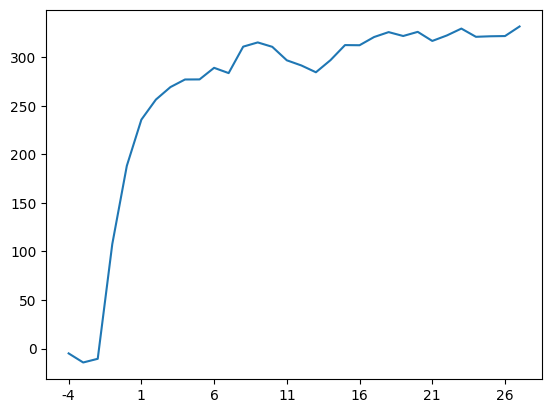

In [5]:
import pandas as pd

pd.Series(data["impact_average"]).plot()

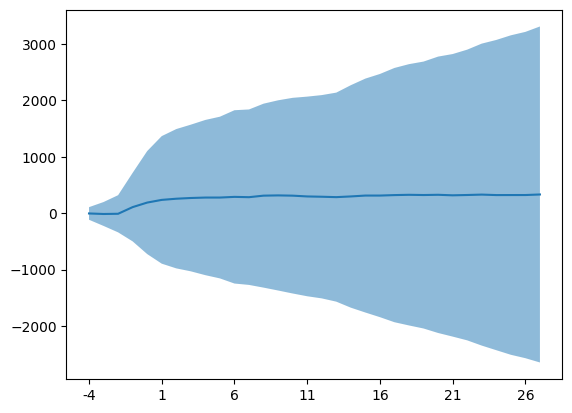

In [6]:
import matplotlib.pyplot as plt

pd.Series(data["impact_average"]).plot()
plt.fill_between(
    pd.Series(data["impact_average"]).index,
    pd.Series(data["impact_average_lower"]).values,
    pd.Series(data["impact_average_upper"]).values,
    alpha=0.5,
)

count     151.000000
mean      296.960599
std       986.697558
min     -2133.562851
25%      -370.196449
50%       241.558525
75%      1440.875370
max      2044.068390
dtype: float64


<Axes: >

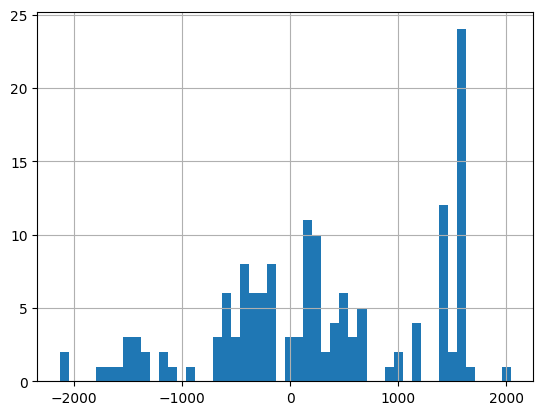

In [7]:
impacts__ = pd.Series(
    [list(ts.values())[4 + 14] for ts in data["individual_impacts"].values()]
)
print(impacts__.describe())
impacts__.hist(bins=50)

In [8]:
res = requests.post(
    # "https://api.dev.mediaimpactmonitor.app/events",
    "http://localhost:8000/events",
    json={
        "event_type": "protest",
        "source": "acled",
        "topic": "climate_change",
        "start_date": "2023-07-01",
        "end_date": "2023-12-31",
        "organizers": ["Last Generation (Germany)"],
        "estimate_impact": "true",
    },
)
res.json()
events = res.json()["data"]
events[0]

{'event_id': '9064cc0660a50363ec2d44a8fe51b376',
 'event_type': 'protest',
 'source': 'acled',
 'date': '2023-12-15',
 'organizers': ['Last Generation (Germany)'],
 'description': 'On 15 December 2023, about 15 Last Generation activists blocked streets at various places across Koln (Nordrhein-Westfalen), demanding immediate climate change. Law enforcers quickly removed them and resumed traffic.',
 'impact': 7.229135759174824}

In [9]:
# from media_impact_monitor.events import get_events
# from media_impact_monitor.types_ import EventSearch

# events = get_events(
#     EventSearch(
#         event_type="protest",
#         source="acled",
#         topic="climate_change",
#         start_date="2023-07-01",
#         end_date="2023-12-31",
#         organizers=["Last Generation (Germany)"],
#         estimate_impact=True,
#     )
# )
# events

count    151.000000
mean       1.403619
std       76.903025
min     -514.594805
25%      -28.978799
50%        0.000000
75%       46.957796
max       75.214991
dtype: float64


<Axes: >

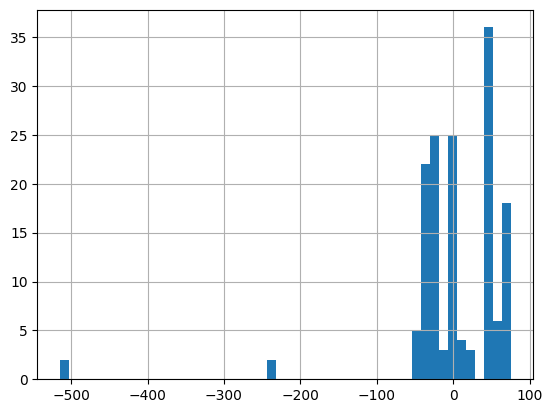

In [10]:
import pandas as pd

impacts_ = pd.Series([event["impact"] for event in events])
print(impacts_.describe())
impacts_.hist(bins=50)